In [155]:
# lexconvergence.jl
#
# Contains various convergence tests and plots on
# IterLex, proposed by Xiao Shi.
# Includes implementation of quadratic minimization.
#
# Started by Aileen Huang, Spring 2017

import Laplacians.intHeap
import Laplacians.intHeapAdd!, Laplacians.intHeapPop!
include("../src/lex.jl")

ITERS = 500


# numIter: Number of iterations
# A: SparseMatrix, the adjacency matrix representation of the graph
# isTerm: An array of bools that designate whether a node
# is a terminal node or not
# initVal: An array of Float64 that designate the potentials
# each node in the graph
#
# simIterLexUnwtdEps runs unweighted IterLex on a graph
# and terminates if no node changes more than EPSILON = 1/n,
# n being the number of nodes in the graph.
# 
# Returns n = number of nodes, t = number of iters, and eps
function simIterLexUnwtdEps{Tv, Ti}(numIter::Int64,
                                 A::SparseMatrixCSC{Tv, Ti},
                                 isTerm::Array{Bool, 1},
                                 initVal::Array{Float64, 1}, )
  n = A.n
  val = copy(initVal)
  nextVal = zeros(Float64, n)
  EPSILON = 1/convert(Float64, n)
    t = 1
    while t <= numIter
    # If all nodes change within some epsilon
    # then there is no point in continuing.
    progress = false
    for u = 1:n
      if (!isTerm[u])
        nbrs = A.rowval[A.colptr[u]:(A.colptr[u + 1] - 1)]
        maxNeighbor = maximum(val[nbrs])
        minNeighbor = minimum(val[nbrs])
        nextVal[u] = minNeighbor + (maxNeighbor - minNeighbor) / 2.0
        if (nextVal[u] - val[u] > EPSILON)
          progress = true
        end
      else
        nextVal[u] = val[u]
      end
    end

    if (!progress)
      @printf("Terminated after %d iterations after getting within epsilon = %f.\n", t, EPSILON)
      return [val, n, t, EPSILON]
    end

    tmp = val
    val = nextVal
    nextVal = tmp
    t = t+1
  end
  return [val, n, t, EPSILON]
end

# numIter: Number of iterations
# A: SparseMatrix, the adjacency matrix representation of the graph
# isTerm: An array of bools that designate whether a node
# is a terminal node or not
# initVal: An array of Float64 that designate the potentials
# each node in the graph
#
# simIterQuadUnwtdEps runs unweighted IterQuad on a graph
# and terminates if no node changes more than EPSILON = 1/n,
# n being the number of nodes in the graph.
#
# 
# Returns n = number of nodes, t = number of iters, and eps
function simIterQuadUnwtdEps{Tv, Ti}(numIter::Int64,
                                 A::SparseMatrixCSC{Tv, Ti},
                                 isTerm::Array{Bool, 1},
                                 initVal::Array{Float64, 1}, )
  n = A.n
  val = copy(initVal)               #current values of graph
  nextVal = zeros(Float64, n)       #values of next iteration
  EPSILON = 1/convert(Float64, n)   #epsilon = 1/n

    t = 1
    while t <= numIter
    # If all nodes change within some epsilon
    # then there is no point in continuing.
    progress = false    # tracks whether algorithm should terminate
    for u = 1:n         # For each node, perform the algorithm...
      if (!isTerm[u])
        nbrs = A.rowval[A.colptr[u]:(A.colptr[u + 1] - 1)]

        avgsum = float(0)
        for i in val[nbrs]
          avgsum += i
        end 
        nextVal[u] = avgsum / length(nbrs)
        if (nextVal[u] - val[u] > EPSILON)
          progress = true
        end
      else
        nextVal[u] = val[u]
      end
    end

    if (!progress)      # Termination criterion
      @printf("Terminated after %d iterations after getting within epsilon = %f.\n", t, EPSILON)
      return [val, n, t, EPSILON]
    end

    tmp = val
    val = nextVal
    nextVal = tmp
    t=t+1
  end
  return [val, n, t, EPSILON]
end

simIterQuadUnwtdEps (generic function with 1 method)

Terminated after 39 iterations after getting within epsilon = 0.010000.
Terminated after 39 iterations after getting within epsilon = 0.010000.
Terminated after 74 iterations after getting within epsilon = 0.005000.
Terminated after 55 iterations after getting within epsilon = 0.005000.
Terminated after 186 iterations after getting within epsilon = 0.002500.
Terminated after 174 iterations after getting within epsilon = 0.002500.


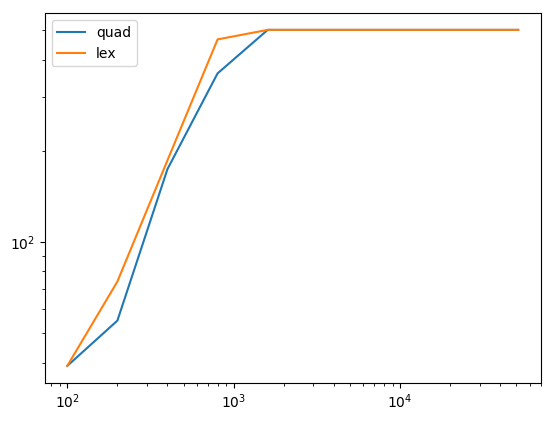

Terminated after 466 iterations after getting within epsilon = 0.001250.
Terminated after 360 iterations after getting within epsilon = 0.001250.


PyObject <matplotlib.legend.Legend object at 0x32e91edd0>

In [146]:
function gridTester(n::Int64, m::Int64, numterms::Int64, startn::Int64, startm::Int64)
#     interval = 10
#     term_interval = 15
    dim_list = []
    quad_iterations = []
    lex_iterations = []
    
    i = startn
    j = startm
    while i <= n
        while j <= m
            dim = i*j
            graph = grid2(i::Int64, j::Int64; isotropy=1)
            isTerm = zeros(Bool, dim)
            initVal = zeros(dim)
            perm = randperm(i*j)[1:numterms]
            for elt in perm
                isTerm[elt] = true
                initVal[elt] = rand(1)[1]
            end
            
            lexVolt = simIterLexUnwtdEps(ITERS, graph, isTerm, initVal)
            quadVolt = simIterQuadUnwtdEps(ITERS, graph, isTerm, initVal)
            push!(dim_list, i*j)
            push!(quad_iterations, quadVolt[3])
            push!(lex_iterations, lexVolt[3])
            j = j*2
        end
        i = i*2
    end
    loglog(dim_list, quad_iterations, label="quad")
    loglog(dim_list, lex_iterations, label="lex")
    legend()
end

gridTester(10000, 10000, 10, 10, 10)

Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 5 iterations after getting within epsilon = 0.050000.
Terminated after 5 iterations after getting within epsilon = 0.050000.
Terminated after 19 iterations after getting within epsilon = 0.025000.
Terminated after 19 iterations after getting within epsilon = 0.025000.
Terminated after 43 iterations after getting within epsilon = 0.012500.
Terminated after 39 iterations after getting within epsilon = 0.012500.
Terminated after 26 iterations after getting within epsilon = 0.006250.
Terminated after 27 iterations after getting within epsilon = 0.006250.
Terminated after 98 iterations after getting within epsilon = 0.003125.
Terminated after 96 iterations after getting within epsilon = 0.003125.
Terminated after 57 iterations after getting within epsilon = 0.001563.
Terminated after 120 iterations after getting within epsilon = 0.001

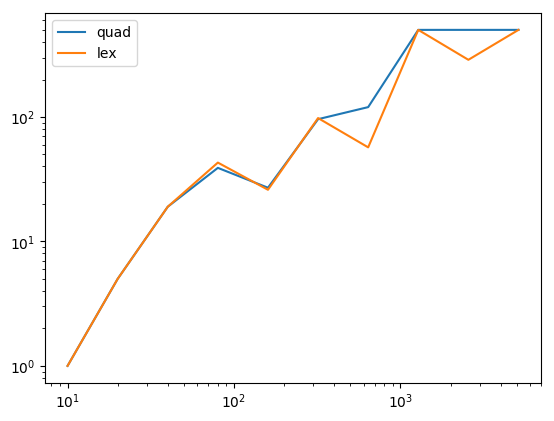

Terminated after 288 iterations after getting within epsilon = 0.000391.


PyObject <matplotlib.legend.Legend object at 0x32a8bb750>

In [39]:
function chimeraTester(n::Int64, numterms::Int64, startn::Int64)
    dim_list = []
    quad_iterations = []
    lex_iterations = []
    
    i = startn
    while i <= n
        graph = chimera(i)
        isTerm = zeros(Bool, i)
        initVal = zeros(i)
        perm = randperm(i)[1:numterms]
        for elt in perm
            isTerm[elt] = true
            initVal[elt] = rand(1)[1]
        end

        lexVolt = simIterLexUnwtdEps(ITERS, graph, isTerm, initVal)
        quadVolt = simIterQuadUnwtdEps(ITERS, graph, isTerm, initVal)
        push!(dim_list, i)
        push!(quad_iterations, quadVolt[3])
        push!(lex_iterations, lexVolt[3])
        i = i*2
    end
    loglog(dim_list, quad_iterations, label="quad")
    loglog(dim_list, lex_iterations, label="lex")
    legend()
end

chimeraTester(10000, 10, 10)

Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 2 iterations after getting within epsilon = 0.050000.
Terminated after 4 iterations after getting within epsilon = 0.050000.
Terminated after 2 iterations after getting within epsilon = 0.025000.
Terminated after 8 iterations after getting within epsilon = 0.025000.
Terminated after 3 iterations after getting within epsilon = 0.012500.
Terminated after 12 iterations after getting within epsilon = 0.012500.
Terminated after 3 iterations after getting within epsilon = 0.006250.
Terminated after 25 iterations after getting within epsilon = 0.006250.
Terminated after 4 iterations after getting within epsilon = 0.003125.
Terminated after 38 iterations after getting within epsilon = 0.003125.
Terminated after 3 iterations after getting within epsilon = 0.001563.
Terminated after 109 iterations after getting within epsilon = 0.001563.
T

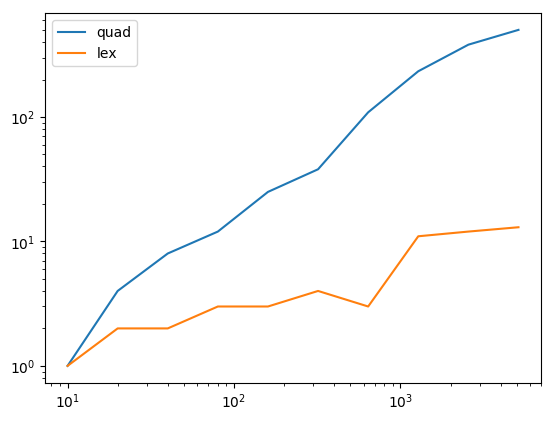

Terminated after 13 iterations after getting within epsilon = 0.000195.


PyObject <matplotlib.legend.Legend object at 0x32af79e90>

In [40]:
function randRegularTester(n::Int64, k::Int64, numterms::Int64, startn::Int64, startm::Int64)
    dim_list = []
    quad_iterations = []
    lex_iterations = []
    
    i = startn
    while i <= n
        dim = i
        graph = randRegular(i, k)
        isTerm = zeros(Bool, dim)
        initVal = zeros(dim)

        perm = randperm(i)[1:numterms]
        for elt in perm
            isTerm[elt] = true
            initVal[elt] = rand(1)[1]
        end

        lexVolt = simIterLexUnwtdEps(ITERS, graph, isTerm, initVal)
        quadVolt = simIterQuadUnwtdEps(ITERS, graph, isTerm, initVal)
        push!(dim_list, i)
        push!(quad_iterations, quadVolt[3])
        push!(lex_iterations, lexVolt[3])
        i = i*2
    end
    loglog(dim_list, quad_iterations, label="quad")
    loglog(dim_list, lex_iterations, label="lex")
    legend()
end

randRegularTester(10000, 1000, 10, 10, 10)

Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 2 iterations after getting within epsilon = 0.050000.
Terminated after 4 iterations after getting within epsilon = 0.050000.
Terminated after 3 iterations after getting within epsilon = 0.025000.
Terminated after 7 iterations after getting within epsilon = 0.025000.
Terminated after 3 iterations after getting within epsilon = 0.012500.
Terminated after 14 iterations after getting within epsilon = 0.012500.
Terminated after 7 iterations after getting within epsilon = 0.006250.
Terminated after 29 iterations after getting within epsilon = 0.006250.


Terminated after 9 iterations after getting within epsilon = 0.003125.
Terminated after 55 iterations after getting within epsilon = 0.003125.
Terminated after 11 iterations after getting within epsilon = 0.001563.
Terminated after 115 iterations after getting within epsilon = 0.001563.
Terminated after 12 iterations after getting within epsilon = 0.000781.
Terminated after 206 iterations after getting within epsilon = 0.000781.
Terminated after 12 iterations after getting within epsilon = 0.000391.
Terminated after 413 iterations after getting within epsilon = 0.000391.


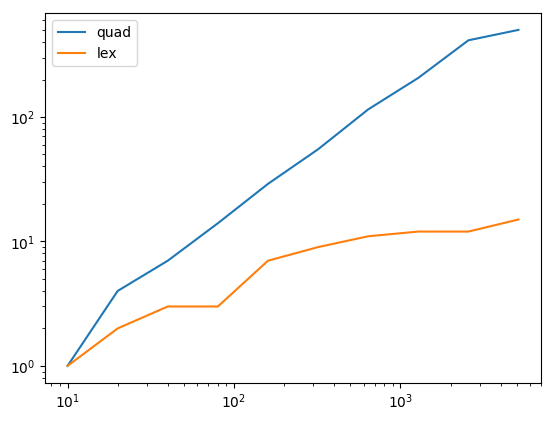

Terminated after 15 iterations after getting within epsilon = 0.000195.


PyObject <matplotlib.legend.Legend object at 0x32b22bd10>

In [42]:
function randGenRingTester(n::Int64, k::Int64, numterms::Int64, startn::Int64, startm::Int64)
    dim_list = []
    quad_iterations = []
    lex_iterations = []
    
    i = startn
    while i <= n
        dim = i
        graph = randRegular(i, k)
        isTerm = zeros(Bool, dim)
        initVal = zeros(dim)

        perm = randperm(i)[1:numterms]
        for elt in perm
            isTerm[elt] = true
            initVal[elt] = rand(1)[1]
        end

        lexVolt = simIterLexUnwtdEps(ITERS, graph, isTerm, initVal)
        quadVolt = simIterQuadUnwtdEps(ITERS, graph, isTerm, initVal)
        push!(dim_list, i)
        push!(quad_iterations, quadVolt[3])
        push!(lex_iterations, lexVolt[3])
        i = i*2
    end
    loglog(dim_list, quad_iterations, label="quad")
    loglog(dim_list, lex_iterations, label="lex")
    legend()
end

randGenRingTester(10000, 100, 10, 10, 10)

In [89]:
function grownGraphTester(n::Int64, k::Int64, numterms::Int64, startn::Int64)
    dim_list = []
    quad_iterations = []
    lex_iterations = []
    
    i = startn
    while i <= n
        dim = i
        graph = randRegular(i, k)
        isTerm = zeros(Bool, dim)
        initVal = zeros(dim)

        perm = randperm(i)[1:numterms]
        for elt in perm
            isTerm[elt] = true
            initVal[elt] = rand(1)[1]
        end

        lexVolt = simIterLexUnwtdEps(ITERS, graph, isTerm, initVal)
        quadVolt = simIterQuadUnwtdEps(ITERS, graph, isTerm, initVal)
        push!(dim_list, i)
        push!(quad_iterations, quadVolt[3])
        push!(lex_iterations, lexVolt[3])
        i = i*2
    end
    return [dim_list, quad_iterations, lex_iterations]
#     loglog(dim_list, quad_iterations, label="quad")
#     loglog(dim_list, lex_iterations, label="lex")
#     legend()
end

grownGraphTester (generic function with 2 methods)

In [139]:
# function ThreeDimTestPlotter(n::Int64, k::Int64, numterms::Int64, startn::Int64)
#     wrapper = []
#     quadTests = []
#     maxVal = 0
#     j = 1
#     while j <= k
# #         push!(wrapper, grownGraphTester(n, k, numterms, startn))
#         append!(quadTests, grownGraphTester(n, k, numterms, startn)[2])
#         print(quadTests)
#         j = j+1
#     end
    
#     rows = k
#     cols = Int(ceil(log2(n/startn)))
#     x = linspace(0, cols)
#     y = linspace(0, rows)
    
#     z = reshape(quadTests, rows, cols)
    
#     fig = figure("pyplot_surfaceplot",figsize=(10,10))
#     ax = fig[:add_subplot](2,1,1, projection = "3d")
#     ax[:plot_surface](x, y, z, rstride=2,edgecolors="k", cstride=2, cmap=ColorMap("gray"), alpha=0.8, linewidth=0.25)
# #     xlabel("X")
# #     ylabel("Y")
# #     title("Surface Plot")

# end
# ThreeDimTestPlotter(100, 3, 10, 10)

Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 6 iterations after getting within epsilon = 0.050000.
Terminated after 6 iterations after getting within epsilon = 0.050000.
Terminated after 20 iterations after getting within epsilon = 0.025000.
Terminated after 14 iterations after getting within epsilon = 0.025000.
Terminated after 26 iterations after getting within epsilon = 0.012500.
Terminated after 27 iterations after getting within epsilon = 0.012500.
Any[1.0,6.0,14.0,27.0]Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 8 iterations after getting within epsilon = 0.050000.
Terminated after 7 iterations after getting within epsilon = 0.050000.
Terminated after 10 iterations after getting within epsilon = 0.025000.
Terminated after 10 iterations after getting withi

Terminated after 18 iterations after getting within epsilon = 0.012500.
Any[1.0,6.0,14.0,27.0,1.0,7.0,10.0,18.0]Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 1 iterations after getting within epsilon = 0.100000.
Terminated after 5 iterations after getting within epsilon = 0.050000.
Terminated after 5 iterations after getting within epsilon = 0.050000.
Terminated after 11 iterations after getting within epsilon = 0.025000.
Terminated after 12 iterations after getting within epsilon = 0.025000.
Terminated after 25 iterations after getting within epsilon = 0.012500.
Terminated after 25 iterations after getting within epsilon = 0.012500.
Any[1.0,6.0,14.0,27.0,1.0,7.0,10.0,18.0,1.0,5.0,12.0,25.0]

LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError('shape mismatch: objects cannot be broadcast to a single shape',)
  File "/Users/Aileen/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py", line 1595, in plot_surface
    X, Y, Z = np.broadcast_arrays(X, Y, Z)
  File "/Users/Aileen/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/numpy/lib/stride_tricks.py", line 250, in broadcast_arrays
    shape = _broadcast_shape(*args)
  File "/Users/Aileen/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/numpy/lib/stride_tricks.py", line 185, in _broadcast_shape
    b = np.broadcast(*args[:32])


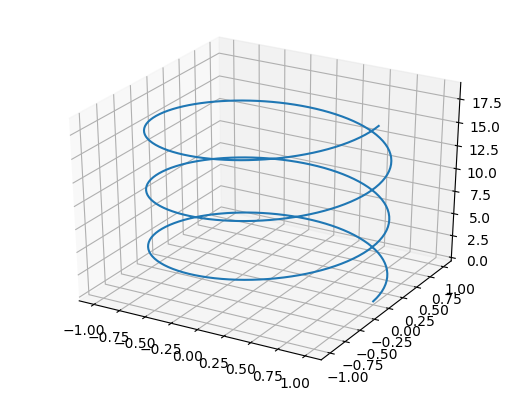

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x32d72cb90>

In [50]:
 θ = linspace(0,6π,300)
plot3D(cos(θ), sin(θ), θ)


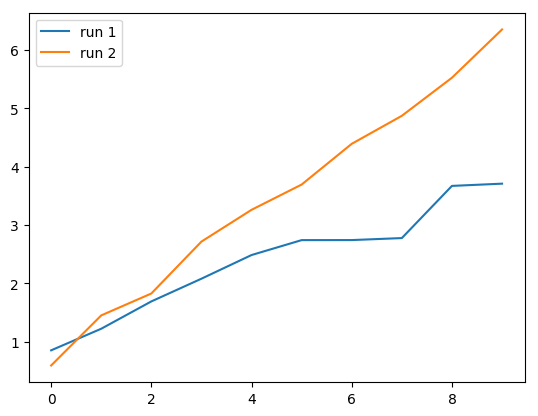

PyObject <matplotlib.legend.Legend object at 0x32cecfb90>

In [44]:
x1 = cumsum(rand(10))
x2 = cumsum(rand(10))
plot(x1,label="run 1")
plot(x2, label="run 2")
legend()

In [57]:
test = []
append!(test, [1,2,3])

3-element Array{Any,1}:
 1
 2
 3

In [54]:
append!(test, [4])

4-element Array{Int64,1}:
 1
 2
 3
 4

In [30]:
rand(1:100,5)

5-element Array{Int64,1}:
 36
 18
 29
 82
 86

In [31]:
rand(5)

5-element Array{Float64,1}:
 0.0782471
 0.757856 
 0.589149 
 0.43121  
 0.7449   

In [32]:
randperm(100)[1:5]

5-element Array{Int64,1}:
 12
 21
 39
 63
 20

In [34]:
rand(1)[1]

0.7211998914894346

In [38]:
perm = randperm(5*5)[1:10]

10-element Array{Int64,1}:
 18
 21
 16
 24
 11
  3
 14
 19
  9
 17

In [156]:
#lexDifference tracks the difference between 
function makeGraph()
    #create a graph
    i = 100
    j = 100

    dim = i*j
    graph = grid2(i::Int64, j::Int64; isotropy=1)
    isTerm = zeros(Bool, dim)
    initVal = zeros(dim)
    numterms = 10

    perm = randperm(i*j)[1:numterms]
    for elt in perm
        isTerm[elt] = true
        initVal[elt] = rand(1)[1]
    end
    
    return [graph, isTerm, initVal]
end
function lexDifference(numIter, A, isTerm, initVal)
    
    sol = simIterLexUnwtd(ITERS, graph, isTerm, initVal)
    val = copy(initVal)
    nextVal = zeros(Float64, n)
    EPSILON = 1/convert(Float64, n)
    t = 1
    difference = []
    while t <= numIter
        # If all nodes change within some epsilon
        # then there is no point in continuing.
        push!(difference, sol - val)
        progress = false
            for u = 1:n
              if (!isTerm[u])
                nbrs = A.rowval[A.colptr[u]:(A.colptr[u + 1] - 1)]
                maxNeighbor = maximum(val[nbrs])
                minNeighbor = minimum(val[nbrs])
                nextVal[u] = minNeighbor + (maxNeighbor - minNeighbor) / 2.0
                if (nextVal[u] - val[u] > EPSILON)
                  progress = true
                end
              else
                nextVal[u] = val[u]
              end
            end

        if (!progress)
          @printf("Terminated after %d iterations after getting within epsilon = %f.\n", t, EPSILON)
          return difference
        end

        tmp = val
        val = nextVal
        nextVal = tmp
        t = t+1
    end
    return difference
    
end
graph = makeGraph()
lexDifference(ITERS, graph[1], graph[2], graph[3])
#maxDifference tracks the maximum difference
# function maxLexDifference()
# end

LoadError: MethodError: no method matching simIterLexUnwtd(::Int64, ::Array{AbstractArray{Float64,N},1}, ::Array{Float64,1}, ::Array{Float64,1})[0m
Closest candidates are:
  simIterLexUnwtd{Tv,Ti}(::Int64, [1m[31m::SparseMatrixCSC{Tv,Ti}[0m, [1m[31m::Array{Bool,1}[0m, ::Array{Float64,1}) at /Users/Aileen/code/490/Laplacians.jl/src/lex.jl:37[0m

In [43]:
?randRegular

search: randRegular



```
graph = randRegular(n::Int64, k::Int64)
```

A sum of k random matchings on n vertices


In [44]:
?randGenRing

search: randGenRing



```
graph = randGenRing(n::Int64, k::Integer)
```

A random generalized ring graph of degree k. Gens always contains 1, and the other k-1 edge types are chosen from an exponential distribution


In [45]:
?grownGraph

search: grownGraph grownGraphD



```
graph = grownGraph(n::Int64, k::Int64)
```

Create a graph on n vertices. For each vertex, give it k edges to randomly chosen prior vertices. This is a variety of a preferential attachment graph.    
